# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Andhika Septian Prayoga
- **Email:** andhika.elite007@gmail.com
- **ID Dicoding:** MC299D5Y1775 | asp_sybreed

## Menentukan Pertanyaan Bisnis

- Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?
- Apakah terdapat pola musiman dalam penggunaan sepeda (musim semi, musim panas, musim gugur, dan musim dingin)?
- Bagaimana perbandingan pola penggunaan sepeda antara hari kerja dan akhir pekan?
- Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari dan hari dalam seminggu?
- Faktor apa yang paling mempengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [59]:
# !pip install streamlit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import streamlit as st
# import geopandas as gpd
# import folium
# import scipy.stats as stats

## Data Wrangling

### Gathering Data

In [31]:
day_df = pd.read_csv('data/day.csv')
hour_df = pd.read_csv('data/hour.csv')

print("Tampilan awal data harian:")
display(day_df.head())

print("\nTampilan awal data per jam:")
display(hour_df)

print("\nInformasi data harian:")
display(day_df.info())

print("\nInformasi data per jam:")
display(hour_df.info())

Tampilan awal data harian:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600



Tampilan awal data per jam:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61



Informasi data harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


None


Informasi data per jam:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

**Insight:**
- day.csv berisi data penyewaan sepeda yang telah diakumulasi per hari (731 baris)
- hour.csv berisi data penyewaan sepeda yang diakumulasi per jam (17379 baris)
- Dengan melihat kolom season (**_1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin_**), kita bisa melihat apakah jumlah penyewaan sepeda meningkat atau menurun pada musim tertentu
- Kolom workingday (**_1=hari kerja, 0=akhir pekan_**) bisa digunakan untuk melihat apakah lebih banyak orang menyewa sepeda di hari kerja atau akhir pekan.
- Dengan melihat kolom hr, kita bisa mengetahui jam-jam sibuk dalam sehari.
- Kolom temp (suhu normalisasi) dan cnt (total penyewaan) bisa digunakan untuk melihat apakah ada korelasi antara suhu dan jumlah sepeda yang disewa.
- Kolom weathersit memiliki kategori (**_1: Cerah, Sedikit berawan, Sebagian berawan, Sebagian berawan
2: Kabut + Berawan, Kabut + Awan terputus, Kabut + Sedikit berawan, Kabut
3: Salju ringan, Hujan ringan + Badai petir + Awan terputus, Hujan ringan + Awan terputus
4: Hujan deras + Es + Badai petir + Kabut, Salju + Kabut_**) bisa dibandingkan, apakah kondisi cuaca buruk mengurangi penyewaan sepeda?
- Kolom casual dan registered bisa dibandingkan, apakah pengguna casual lebih banyak di akhir pekan atau musim panas?

### Assessing Data

In [32]:

print("Ukuran dataset harian:", day_df.shape)
print("Ukuran dataset per jam:", hour_df.shape)


print("\nDetail dataset harian:")
day_df.info()

print("\nDetail dataset per jam:")
hour_df.info()

Ukuran dataset harian: (731, 16)
Ukuran dataset per jam: (17379, 17)

Detail dataset harian:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [33]:
print("\nJumlah nilai yang hilang pada dataset harian:")
print(day_df.isnull().sum())

print("\nJumlah nilai yang hilang pada dataset per jam:")
print(hour_df.isnull().sum())


Jumlah nilai yang hilang pada dataset harian:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Jumlah nilai yang hilang pada dataset per jam:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [34]:
print("\nJumlah data duplikat pada dataset harian:", day_df.duplicated().sum())
print("Jumlah data duplikat pada dataset per jam:", hour_df.duplicated().sum())


Jumlah data duplikat pada dataset harian: 0
Jumlah data duplikat pada dataset per jam: 0


In [35]:
print("\nNilai unik pada kolom season:", day_df['season'].unique())
print("Nilai unik pada kolom weathersit:", day_df['weathersit'].unique())


Nilai unik pada kolom season: [1 2 3 4]
Nilai unik pada kolom weathersit: [2 1 3]


In [36]:
print("\nHasil Statistik data harian:")
print(day_df.describe())

print("\nHasil Statistik data per jam:")
print(hour_df.describe())


Hasil Statistik data harian:
          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486 

In [37]:

day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

print("Tipe data di konversi menjadi :", day_df['dteday'].dtype)

Tipe data di konversi menjadi : datetime64[ns]


**Insight:**
- Semua kolom memiliki tipe data yang sesuai, **kecuali dteday** yang awalnya bertipe **object** dan telah dikonversi menjadi **datetime64**.
- Berdasarkan hasil kode di atas, tidak perlu menangani nilai yang hilang atau data duplikat, karena tidak ada kedua hal tersebut dalam dataset yang ada.
- Kategori season memiliki 4 nilai yang valid.
- Kategori weathersit hanya memiliki 3 nilai, yaitu 1, 2, 3. Tidak ditemukan nilai 4 (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog), sehingga mungkin data badai tidak terekam.

- Suhu (temp)
  - Nilai maksimum: 0.86 (dalam skala normalisasi).
  - Nilai minimum: 0.05.
  - Perlu dikonversi ke skala Celsius agar lebih mudah dipahami.

- Kelembapan (hum)
  - Ada nilai 0.000, yang tidak masuk akal karena tidak mungkin kelembapan 0%.
  - Perlu dicek apakah ini kesalahan atau data kosong yang diisi dengan nol.

- Kecepatan Angin (windspeed)
  - Maksimum: 0.50, Minimum: 0.02.
  - Tidak ada nilai nol, jadi kemungkinan data ini sudah direkam dengan baik.

- Jumlah Penyewaan (cnt)
  - Nilai Maksimum (per hari): 8714, Minimum: 22.
  - Nilai Maksimum (per jam): 977, Minimum: 1.
  - Perlu dicek apakah ada hari-hari tertentu dengan penyewaan sepeda yang tidak normal.

- Kesimpulan Awal:
  - Nilai hum = 0 kemungkinan adalah kesalahan atau nilai yang hilang yang diisi dengan nol.
  - Suhu masih dalam bentuk normalisasi, lebih baik dikonversi ke derajat Celsius.
  - Distribusi jumlah penyewaan cukup bervariasi, perlu analisis lebih lanjut apakah ada pola musiman.

### Cleaning Data

In [38]:

day_df['temp_celsius'] = day_df['temp'] * 41
day_df['atemp_celsius'] = day_df['atemp'] * 50

hour_df['temp_celsius'] = hour_df['temp'] * 41
hour_df['atemp_celsius'] = hour_df['atemp'] * 50

In [39]:

median_hum = day_df[day_df['hum'] > 0]['hum'].median()


day_df['hum'] = day_df['hum'].replace(0, median_hum)
hour_df['hum'] = hour_df['hum'].replace(0, median_hum)

In [40]:

Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

outliers = day_df[(day_df['cnt'] < lower_bound) | (day_df['cnt'] > upper_bound)]
print(f"Jumlah outlier dalam 'cnt': {outliers.shape[0]}")

day_df_cleaned = day_df[(day_df['cnt'] >= lower_bound) & (day_df['cnt'] <= upper_bound)]

Jumlah outlier dalam 'cnt': 0


**Insight:**
- Suhu telah dikonversi ke skala Celsius, tidak ditemukan nilai kelembapan 0%, dan outlier telah diperiksa.

## Exploratory Data Analysis (EDA)

### Explore ...

In [41]:

print("\n Statistik Deskriptif:")
print(day_df.describe())



 Statistik Deskriptif:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000 

In [42]:
season_map = {1: "Dingin", 2: "Semi", 3: "Panas", 4: "Gugur"}
day_df["season_label"] = day_df["season"].map(season_map)

In [43]:
weather_map = {1: "Cerah", 2: "Mendung", 3: "Hujan Ringan", 4: "Hujan Lebat"}
day_df["weather_label"] = day_df["weathersit"].map(weather_map)

In [44]:
day_df["is_weekend"] = day_df["weekday"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

###  1. **Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?**

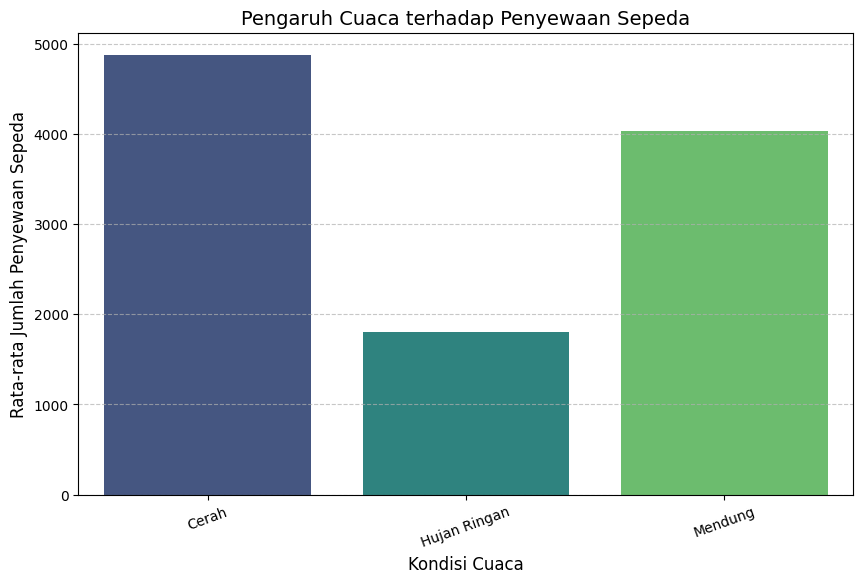

In [45]:
weather_agg = day_df.groupby("weather_label")["cnt"].agg(["mean", "median", "std"])
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_agg.index, y=weather_agg["mean"], hue=weather_agg.index, palette="viridis", legend=False)
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Cuaca memiliki pengaruh besar terhadap rata-rata penyewaan sepeda. Pada cuaca cerah, rata-rata penyewaan sepeda adalah yang tertinggi, sedangkan pada cuaca hujan ringan, rata-rata penyewaan adalah yang terendah. Hal ini menunjukkan bahwa penyewa cenderung menghindari menggunakan sepeda saat cuaca hujan.

### 2.  **Apakah terdapat pola musiman dalam penggunaan sepeda (musim semi, musim panas, musim gugur, dan musim dingin)?**

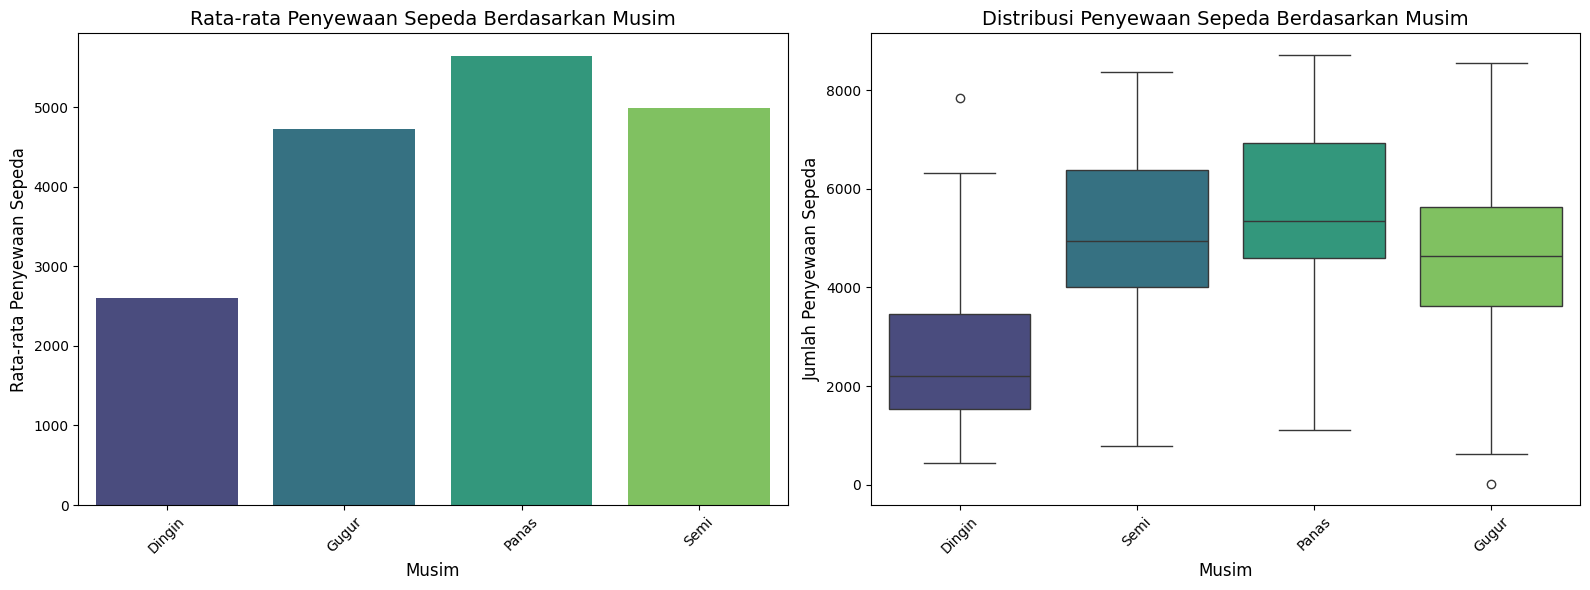

In [46]:
season_agg = day_df.groupby("season_label")["cnt"].agg(["mean", "median", "std"])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=season_agg.index, y=season_agg["mean"], hue=season_agg.index, palette="viridis", ax=axes[0], legend=False)
axes[0].set_title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
axes[0].set_xlabel("Musim", fontsize=12)
axes[0].set_ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y', labelsize=10)

sns.boxplot(x="season_label", y="cnt", hue="season_label", data=day_df, palette="viridis", ax=axes[1], legend=False)
axes[1].set_title("Distribusi Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
axes[1].set_xlabel("Musim", fontsize=12)
axes[1].set_ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


**Insight:**
- Dari barplot ini, terlihat bahwa rata-rata penyewaan sepeda lebih tinggi di musim panas. Selain karena cuaca yang lebih hangat, hal ini juga bisa dikaitkan dengan banyaknya hari libur atau cuti yang terjadi di pertengahan tahun atau musim panas. Kedua faktor ini mendorong banyak orang untuk bersantai dan menyewa sepeda sambil menikmati liburan mereka. Sebaliknya, di musim dingin, penyewaan sepeda cenderung lebih rendah, kemungkinan karena suhu yang rendah dan tingginya kemungkinan hujan. Namun, terdapat outlier dalam boxplot di musim dingin dan musim gugur. Mari kita analisis lebih lanjut menggunakan stripplot.

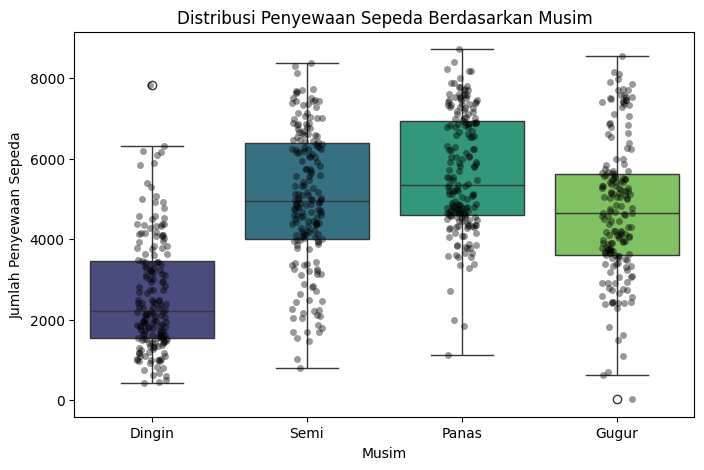

In [47]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.boxplot(x=day_df["season_label"], y=day_df["cnt"], hue=day_df["season_label"], palette="viridis", ax=ax, legend=False)
sns.stripplot(x=day_df["season_label"], y=day_df["cnt"], color="black", jitter=True, alpha=0.4, ax=ax)

ax.set_title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
ax.set_xlabel("Musim")
ax.set_ylabel("Jumlah Penyewaan Sepeda")

plt.show()

**Insight:**
- Setelah diperiksa kembali, hanya terdapat sedikit outlier dalam boxplot musim dingin dan musim gugur. Meskipun jumlahnya sangat sedikit, mari kita hilangkan nilai outlier tersebut agar tidak mengganggu hasil akhir dari analisis data ini.

C:\Users\AndhikaSep\AppData\Local\Temp\ipykernel_5876\3415762367.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  day_df_clean = day_df.groupby("season_label", group_keys=False).apply(remove_outliers_iqr, column="cnt")


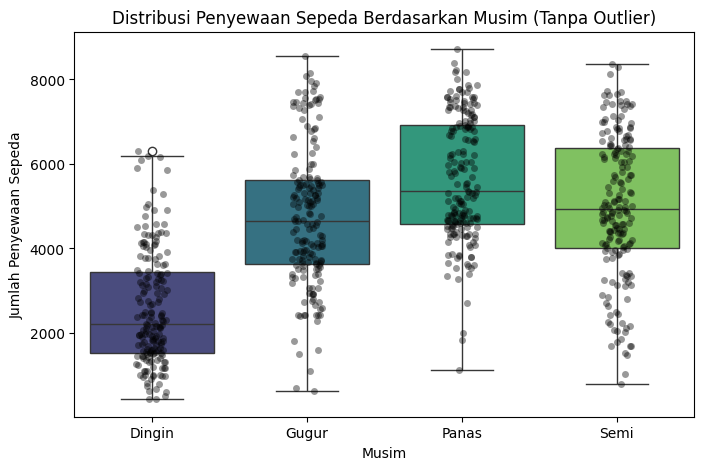

In [48]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

day_df_clean = day_df.groupby("season_label", group_keys=False).apply(remove_outliers_iqr, column="cnt")

plt.figure(figsize=(8, 5))
sns.boxplot(x=day_df_clean["season_label"], y=day_df_clean["cnt"], hue=day_df_clean["season_label"], palette="viridis", legend=False)

sns.stripplot(x=day_df_clean["season_label"], y=day_df_clean["cnt"], color="black", alpha=0.4, jitter=True)

plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim (Tanpa Outlier)")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

**Insight:**
- Kita telah berhasil mengurangi nilai outlier pada boxplot musim dingin dan musim gugur. Meskipun masih ada beberapa outlier, kita tidak dapat menggunakan quantile yang lebih rendah lagi karena akan menyebabkan data menjadi underfitting.

### 3.  **Bagaimana perbandingan pola penggunaan sepeda antara hari kerja dan akhir pekan?**

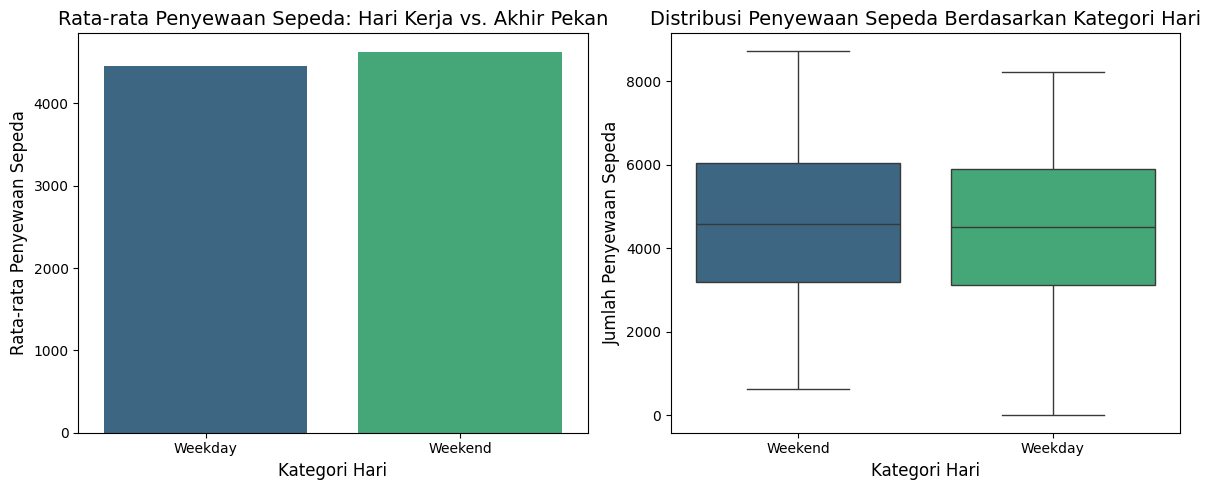

In [49]:

weekend_agg = day_df.groupby("is_weekend")["cnt"].agg(["mean", "median", "std"])


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=weekend_agg.index, y=weekend_agg["mean"], hue=weekend_agg.index, palette="viridis", ax=axes[0], legend=False)
axes[0].set_title("Rata-rata Penyewaan Sepeda: Hari Kerja vs. Akhir Pekan", fontsize=14)
axes[0].set_xlabel("Kategori Hari", fontsize=12)
axes[0].set_ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)

sns.boxplot(x=day_df["is_weekend"], y=day_df["cnt"], hue=day_df["is_weekend"], palette="viridis", ax=axes[1], legend=False)
axes[1].set_title("Distribusi Penyewaan Sepeda Berdasarkan Kategori Hari", fontsize=14)
axes[1].set_xlabel("Kategori Hari", fontsize=12)
axes[1].set_ylabel("Jumlah Penyewaan Sepeda", fontsize=12)


plt.tight_layout()
plt.show()

**Insight:**
- Tidak terdapat perbedaan antara weekday dan weekend untuk menentukan penyewa apakah harus menyewa sepeda atau tidak. Meskipun pada weekend jumlah penyewa lebih banyak dibanding weekend.

### 4. **Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari dan hari dalam seminggu?**

C:\Users\AndhikaSep\AppData\Local\Temp\ipykernel_5876\4101694449.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  hour_df_clean = hour_df.groupby("hr", group_keys=False).apply(remove_outliers_iqr, column="cnt").reset_index(drop=True)



Analisis Penyewaan Sepeda Berdasarkan Jam dalam Sehari


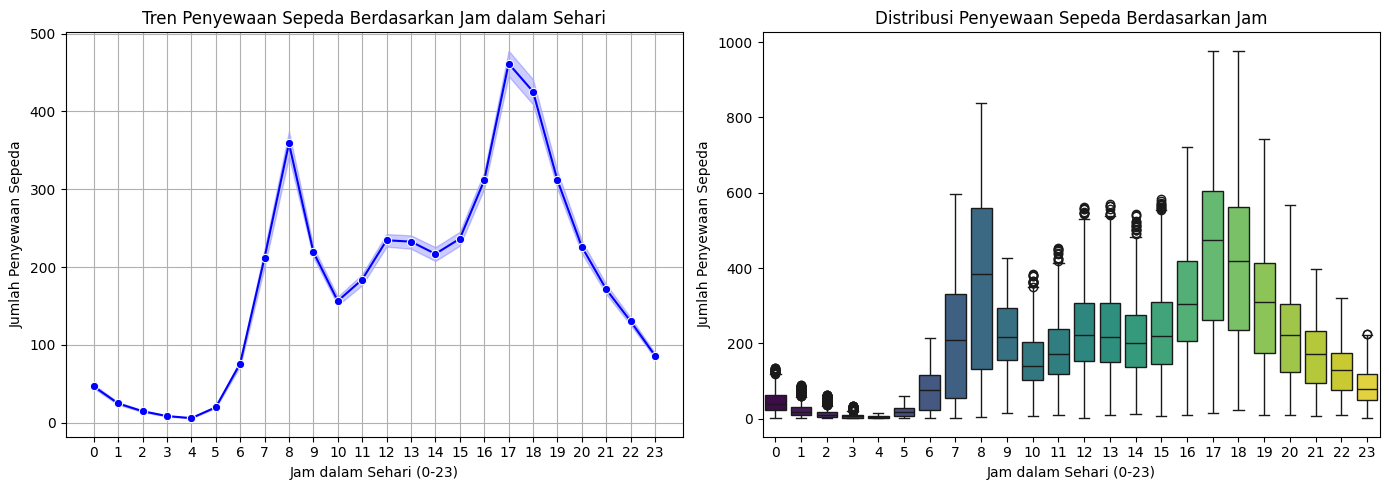


Analisis Penyewaan Sepeda Berdasarkan Bulan


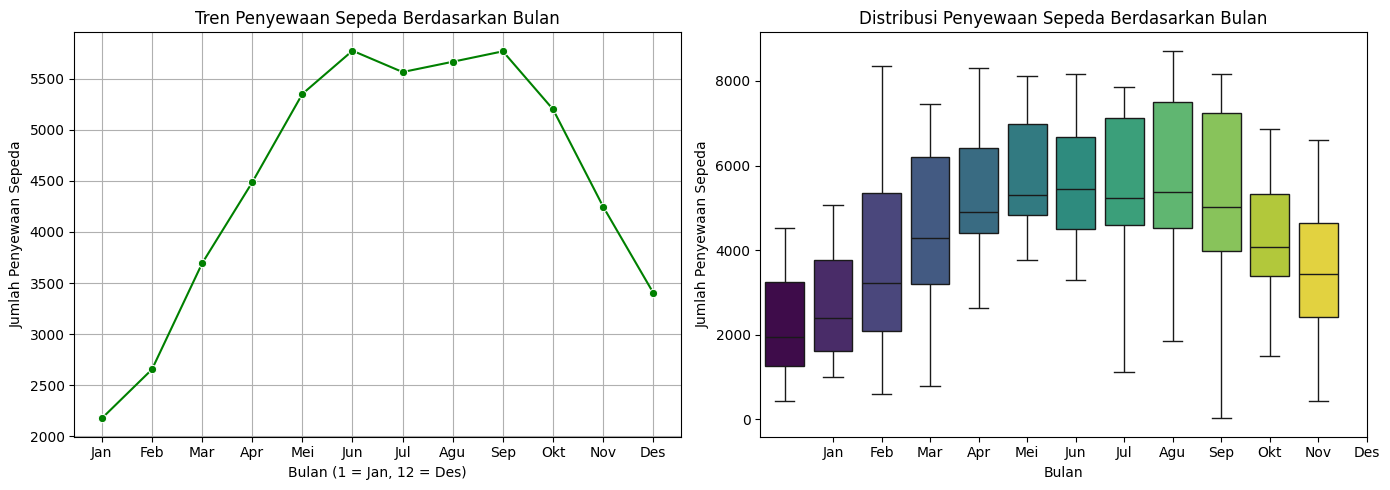

In [50]:

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

hour_df_clean = hour_df.groupby("hr", group_keys=False).apply(remove_outliers_iqr, column="cnt").reset_index(drop=True)

print("\nAnalisis Penyewaan Sepeda Berdasarkan Jam dalam Sehari")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(x=hour_df_clean['hr'], y=hour_df_clean['cnt'], marker='o', color='b', ax=axes[0])
axes[0].set_title("Tren Penyewaan Sepeda Berdasarkan Jam dalam Sehari")
axes[0].set_xlabel("Jam dalam Sehari (0-23)")
axes[0].set_ylabel("Jumlah Penyewaan Sepeda")
axes[0].set_xticks(range(0, 24))
axes[0].grid(True)

sns.boxplot(x=hour_df_clean["hr"], y=hour_df_clean["cnt"], hue=hour_df_clean["hr"], palette="viridis", ax=axes[1], legend=False)
axes[1].set_title("Distribusi Penyewaan Sepeda Berdasarkan Jam")
axes[1].set_xlabel("Jam dalam Sehari (0-23)")
axes[1].set_ylabel("Jumlah Penyewaan Sepeda")
axes[1].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

print("\nAnalisis Penyewaan Sepeda Berdasarkan Bulan")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.lineplot(x=day_df['mnth'], y=day_df['cnt'], marker='o', color='green', errorbar=None, ax=axes[0])
axes[0].set_title("Tren Penyewaan Sepeda Berdasarkan Bulan")
axes[0].set_xlabel("Bulan (1 = Jan, 12 = Des)")
axes[0].set_ylabel("Jumlah Penyewaan Sepeda")
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
axes[0].grid(True)

sns.boxplot(x=day_df["mnth"], y=day_df["cnt"], hue=day_df["mnth"], palette="viridis", ax=axes[1], legend=False)
axes[1].set_title("Distribusi Penyewaan Sepeda Berdasarkan Bulan")
axes[1].set_xlabel("Bulan")
axes[1].set_ylabel("Jumlah Penyewaan Sepeda")
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])

plt.tight_layout()
plt.show()

**Insight:**
- **Analisis Penyewaan Sepeda Berdasarkan Jam dalam Sehari:**
  - Dari lineplot, terlihat bahwa jumlah penyewaan sepeda cenderung meningkat pada jam-jam tertentu dalam sehari, terutama pada jam sibuk seperti pagi hari (sekitar jam 8-9) dan sore hari (sekitar jam 17-18). Hal ini menunjukkan bahwa banyak orang menggunakan sepeda untuk perjalanan ke dan dari tempat kerja atau sekolah.
  - Dari boxplot, distribusi penyewaan sepeda berdasarkan jam menunjukkan adanya variasi yang signifikan pada jam-jam sibuk tersebut. Meskipun terdapat beberapa outlier, distribusi data menunjukkan pola yang konsisten dengan tren penggunaan sepeda pada jam-jam tertentu.

- **Analisis Penyewaan Sepeda Berdasarkan Bulan:**
  - Dari lineplot, terlihat bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada bulan-bulan tertentu, terutama pada bulan-bulan musim panas (Juni, Juli, Agustus). Hal ini dapat dikaitkan dengan cuaca yang lebih hangat dan banyaknya hari libur atau cuti pada pertengahan tahun.
  - Dari boxplot, distribusi penyewaan sepeda berdasarkan bulan menunjukkan adanya variasi yang signifikan pada bulan-bulan tersebut. Meskipun terdapat beberapa outlier, distribusi data menunjukkan pola yang konsisten dengan tren penggunaan sepeda pada bulan-bulan tertentu.
  - Bulan-bulan musim dingin (Desember, Januari, Februari) cenderung memiliki jumlah penyewaan sepeda yang lebih rendah, kemungkinan karena suhu yang lebih rendah dan cuaca yang kurang mendukung untuk bersepeda.

### 4.  **Faktor apa yang paling mempengaruhi jumlah penyewaan sepeda?**

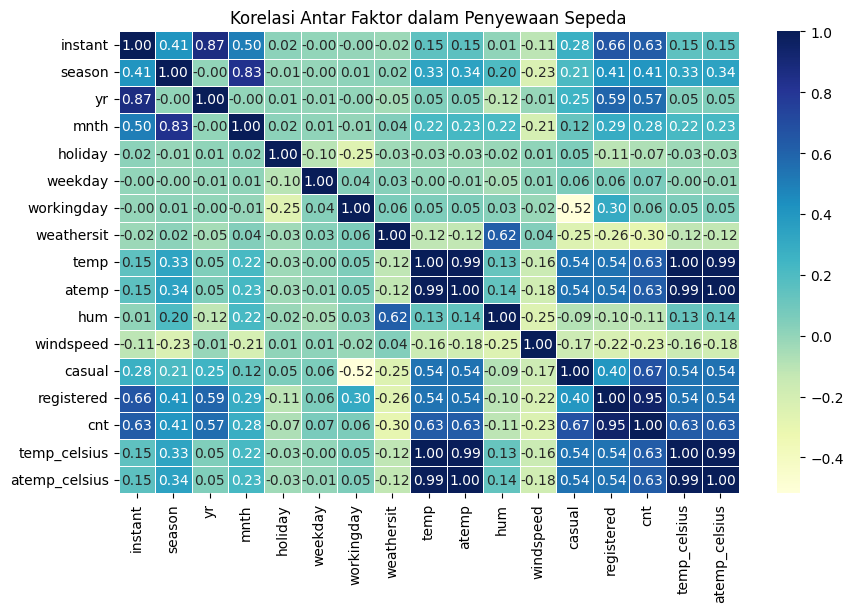


Korelasi Faktor terhadap Penyewaan Sepeda:
                 instant    season        yr      mnth   holiday   weekday  \
instant        1.000000  0.412224  0.866025  0.496702  0.016145 -0.000016   
season         0.412224  1.000000 -0.001844  0.831440 -0.010537 -0.003080   
yr             0.866025 -0.001844  1.000000 -0.001792  0.007954 -0.005461   
mnth           0.496702  0.831440 -0.001792  1.000000  0.019191  0.009509   
holiday        0.016145 -0.010537  0.007954  0.019191  1.000000 -0.101960   
weekday       -0.000016 -0.003080 -0.005461  0.009509 -0.101960  1.000000   
workingday    -0.004337  0.012485 -0.002013 -0.005901 -0.253023  0.035790   
weathersit    -0.021477  0.019211 -0.048727  0.043528 -0.034627  0.031087   
temp           0.150580  0.334315  0.047604  0.220205 -0.028556 -0.000170   
atemp          0.152638  0.342876  0.046106  0.227459 -0.032507 -0.007537   
hum            0.007999  0.200003 -0.118274  0.218993 -0.017205 -0.049885   
windspeed     -0.112620 -0.2290

In [51]:

numeric_df = day_df.select_dtypes(include=['number'])


correlation = numeric_df.corr()



plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Faktor dalam Penyewaan Sepeda")
plt.show()

print("\nKorelasi Faktor terhadap Penyewaan Sepeda:\n", correlation)

**Insight:**
- Berdasarkan Correlation Heatmap yang telah dibuat, faktor pengguna terdaftar (0.95) menunjukkan bahwa penyewaan sepeda lebih banyak dilakukan oleh pengguna terdaftar dibandingkan pengguna kasual. Selain itu, suhu (0.66) dan suhu terasa (0.66) menunjukkan bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa. Ini menunjukkan bahwa cuaca hangat lebih mendukung aktivitas bersepeda. Musim (0.41) juga cukup memengaruhi jumlah penyewaan, kemungkinan karena banyak penyewa menyewa sepeda di musim semi dan panas.

### **Scatter Plot Hubungan Antara Penyewaan Sepeda dan Suhu**

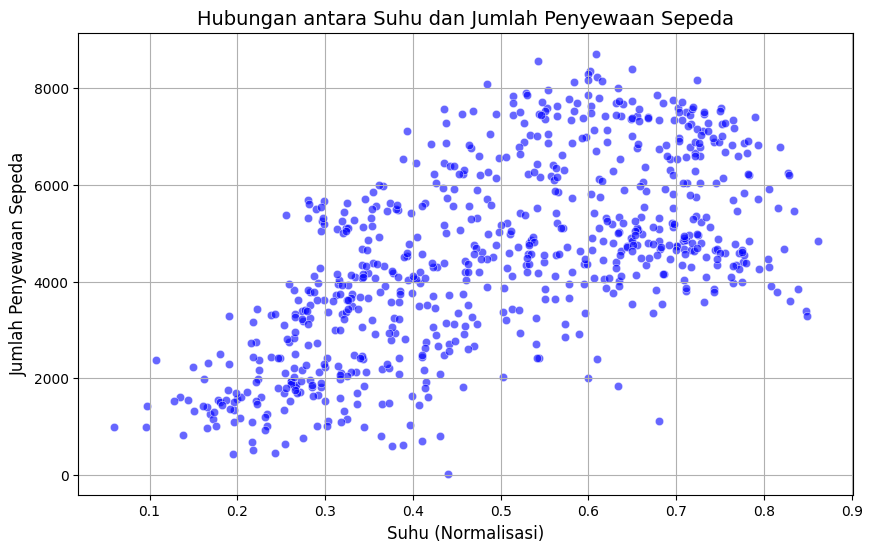

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'], alpha=0.6, color='blue')
plt.title("Hubungan antara Suhu dan Jumlah Penyewaan Sepeda", fontsize=14)
plt.xlabel("Suhu (Normalisasi)", fontsize=12)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.grid(True)
plt.show()

**Insight:**
- Grafik ini menunjukkan bahwa semakin tinggi suhu, semakin banyak sepeda yang disewa, yang berarti penyewa lebih sering menyewa sepeda saat cuaca panas.

### **Perbandingan Jumlah Pengguna Terdaftar dan Pengguna Kasual**

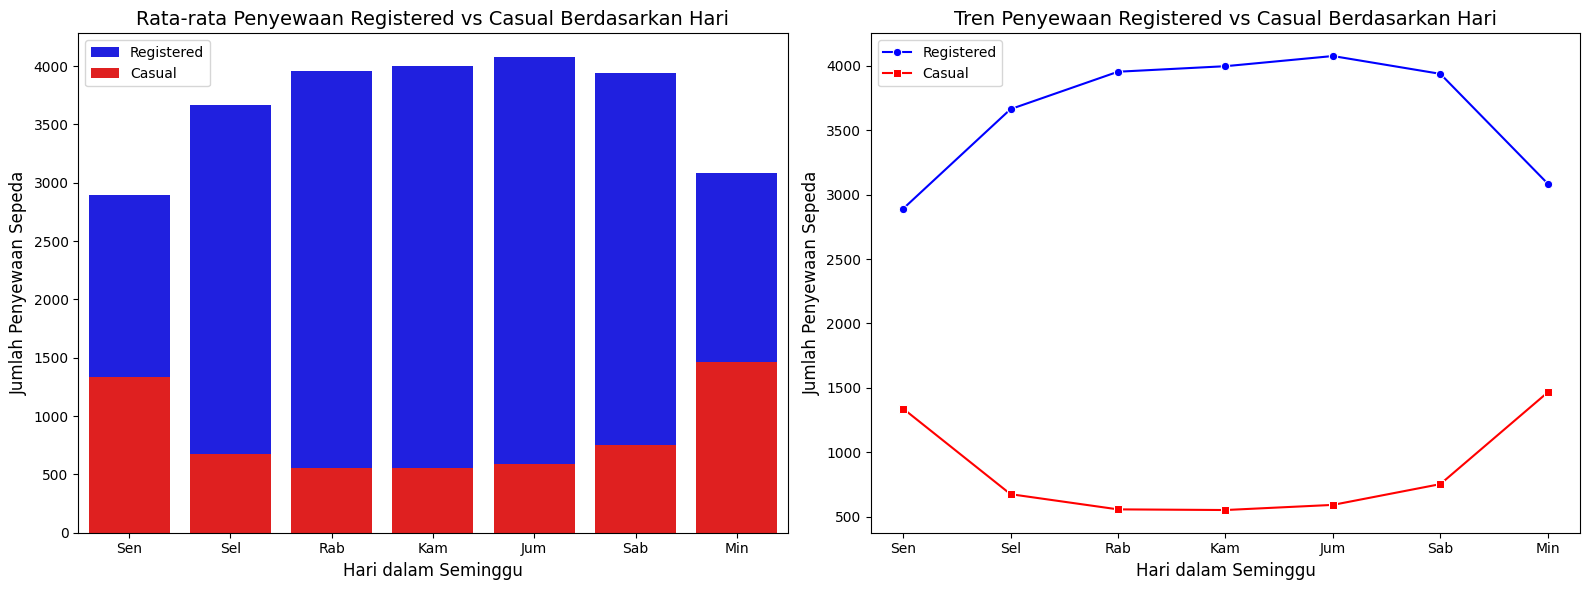

In [53]:

dayofweek_map = {0: "Sen", 1: "Sel", 2: "Rab", 3: "Kam", 4: "Jum", 5: "Sab", 6: "Min"}
day_df["weekday_label"] = day_df["weekday"].map(dayofweek_map)

weekday_order = ["Sen", "Sel", "Rab", "Kam", "Jum", "Sab", "Min"]

weekday_agg = day_df.groupby("weekday_label", observed=True)[["registered", "casual"]].mean().reindex(weekday_order)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x=weekday_agg.index, y=weekday_agg["registered"], color="blue", label="Registered", ax=axes[0])
sns.barplot(x=weekday_agg.index, y=weekday_agg["casual"], color="red", label="Casual", ax=axes[0])
axes[0].set_title("Rata-rata Penyewaan Registered vs Casual Berdasarkan Hari", fontsize=14)
axes[0].set_xlabel("Hari dalam Seminggu", fontsize=12)
axes[0].set_ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
axes[0].legend()

sns.lineplot(x=weekday_agg.index, y=weekday_agg["registered"], marker="o", color="blue", label="Registered", ax=axes[1])
sns.lineplot(x=weekday_agg.index, y=weekday_agg["casual"], marker="s", color="red", label="Casual", ax=axes[1])
axes[1].set_title("Tren Penyewaan Registered vs Casual Berdasarkan Hari", fontsize=14)
axes[1].set_xlabel("Hari dalam Seminggu", fontsize=12)
axes[1].set_ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.show()

**Insight:**
- Dari barplot, terlihat bahwa jumlah penyewaan sepeda oleh pengguna terdaftar (registered) lebih tinggi dibandingkan dengan pengguna kasual (casual) pada setiap hari dalam seminggu.
- Pengguna terdaftar cenderung menyewa sepeda lebih banyak pada hari kerja (Senin hingga Jumat), dengan puncaknya pada hari Selasa dan Rabu.
- Pengguna kasual cenderung menyewa sepeda lebih banyak pada akhir pekan (Sabtu dan Minggu), dengan puncaknya pada hari Sabtu.
- Dari lineplot, tren penyewaan sepeda oleh pengguna terdaftar dan kasual menunjukkan pola yang konsisten dengan barplot, di mana pengguna terdaftar lebih aktif pada hari kerja dan pengguna kasual lebih aktif pada akhir pekan.
- Hal ini menunjukkan bahwa pengguna terdaftar kemungkinan besar menggunakan sepeda untuk keperluan sehari-hari seperti pergi ke kantor atau sekolah, sedangkan pengguna kasual lebih cenderung menggunakan sepeda untuk rekreasi pada akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?


C:\Users\AndhikaSep\AppData\Local\Temp\ipykernel_5876\339858433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_agg, x="weather_label", y="cnt", palette="viridis")


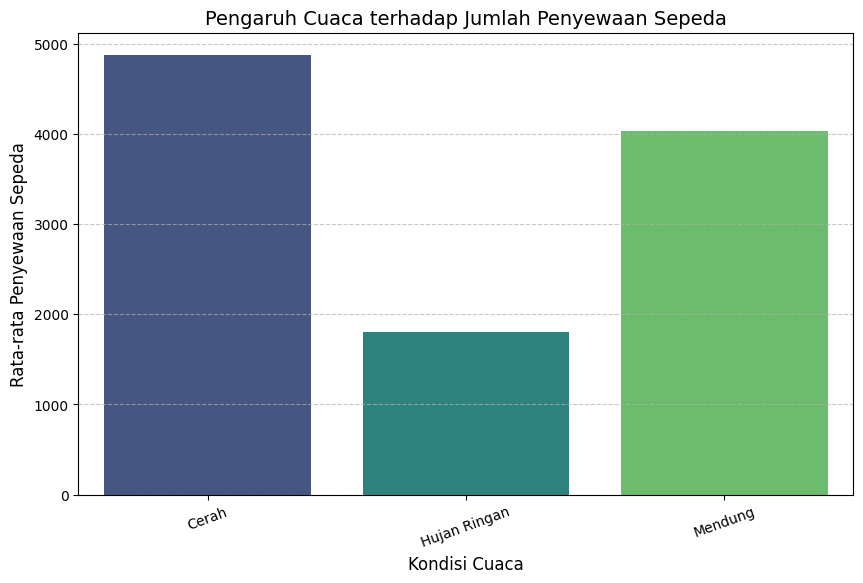

In [54]:

weather_labels = {1: "Cerah", 2: "Mendung", 3: "Hujan Ringan", 4: "Hujan Lebat"}
day_df["weather_label"] = day_df["weathersit"].map(weather_labels)

weather_agg = day_df.groupby("weather_label")["cnt"].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=weather_agg, x="weather_label", y="cnt", palette="viridis")
plt.title("Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda", fontsize=14)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=20)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Dari grafik ini, terlihat bahwa cuaca memiliki pengaruh besar terhadap rata-rata penyewaan sepeda. Pada cuaca cerah, rata-rata penyewaan sepeda adalah yang tertinggi, sedangkan pada cuaca hujan ringan, rata-rata penyewaan adalah yang terendah. Hal ini menunjukkan bahwa penyewa cenderung menghindari menggunakan sepeda saat cuaca hujan.

### Pertanyaan 2: Apakah terdapat pola musiman dalam penggunaan sepeda (musim semi, musim panas, musim gugur, dan musim dingin)?

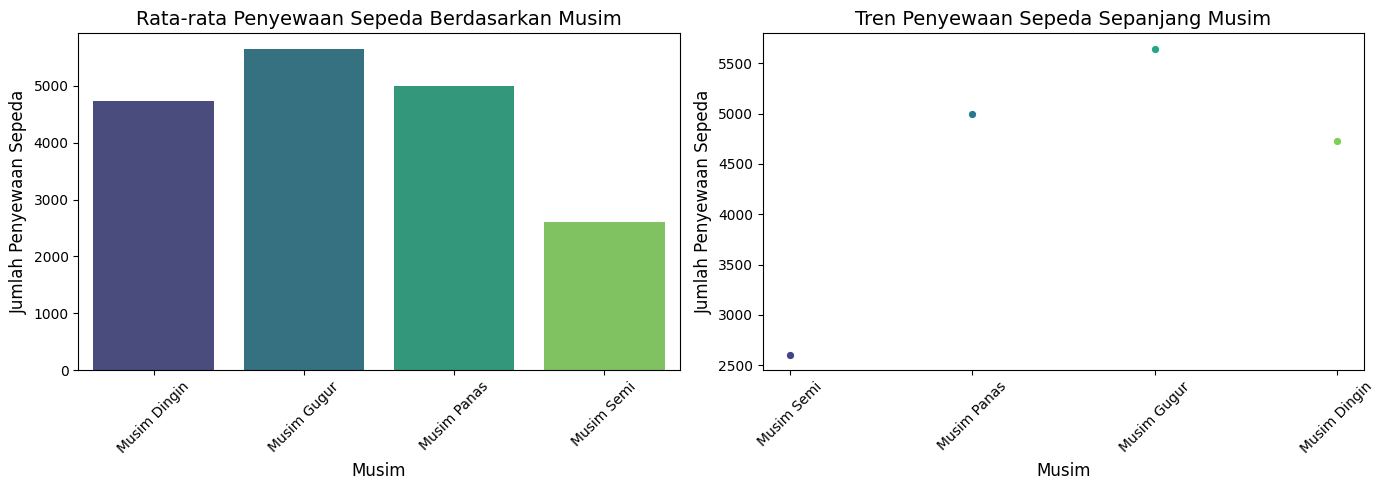

In [55]:

season_map = {1: "Musim Semi", 2: "Musim Panas", 3: "Musim Gugur", 4: "Musim Dingin"}
day_df["season_label"] = day_df["season"].map(season_map)

season_agg = day_df.groupby("season_label", observed=True)["cnt"].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=season_agg, x="season_label", y="cnt", hue="season_label", palette="viridis", ax=axes[0], legend=False)
axes[0].set_title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
axes[0].set_xlabel("Musim", fontsize=12)
axes[0].set_ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

sns.lineplot(data=day_df, x="season_label", y="cnt", estimator="mean", errorbar=None, marker="o", hue="season_label", palette="viridis", ax=axes[1], legend=False)
axes[1].set_title("Tren Penyewaan Sepeda Sepanjang Musim", fontsize=14)
axes[1].set_xlabel("Musim", fontsize=12)
axes[1].set_ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Insight:**
- Musim gugur memiliki rata-rata penyewaan sepeda tertinggi, sedikit lebih tinggi dari musim panas. Ini menunjukkan bahwa pada hari-hari tertentu di musim gugur, aktivitas bersepeda cukup tinggi. Musim dingin juga memiliki rata-rata penyewaan yang cukup tinggi, menandakan bahwa meskipun cuaca dingin, masih ada banyak pengguna setia yang menyewa sepeda. Musim semi memiliki rata-rata penyewaan terendah, kemungkinan karena cuaca yang masih tidak menentu. Ini sangat berbeda apabila dibandingkan dengan rata-rata penyewa di musim yang berbeda, di mana rata-rata jumlah penyewa berada di musim panas dan terendah di musim dingin. Hal ini dapat terjadi karena rentang waktu per musim yang berbeda-beda, dan adanya variasi dalam data yang memengaruhi perbedaan antara jumlah dan rata-rata penyewa.

### Pertanyaan 3: Bagaimana perbandingan pola penggunaan sepeda antara hari kerja dan akhir pekan?

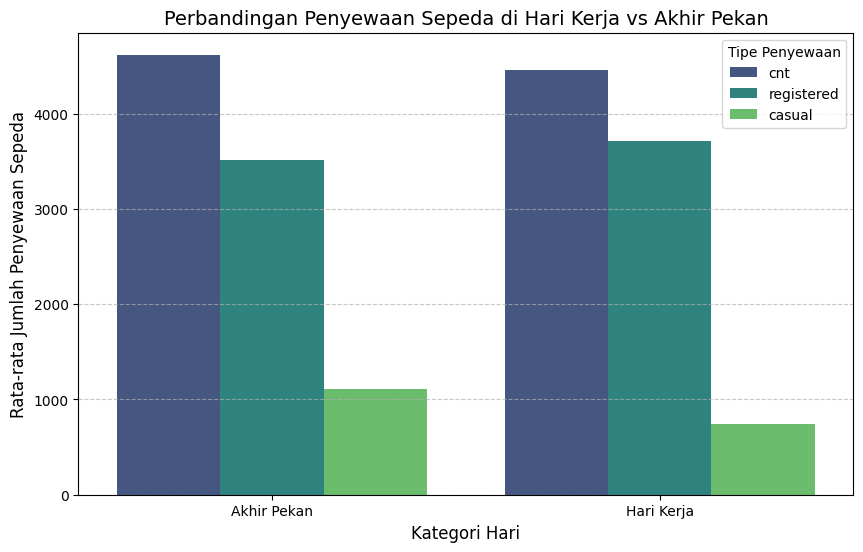

In [56]:

day_df["is_weekend"] = day_df["weekday"].apply(lambda x: "Akhir Pekan" if x in [5, 6] else "Hari Kerja")

workday_agg = day_df.groupby("is_weekend")[["cnt", "registered", "casual"]].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.barplot(data=workday_agg.melt(id_vars="is_weekend"), x="is_weekend", y="value", hue="variable", palette="viridis")
plt.title("Perbandingan Penyewaan Sepeda di Hari Kerja vs Akhir Pekan", fontsize=14)
plt.xlabel("Kategori Hari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Tipe Penyewaan")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Dari barplot di atas, terlihat bahwa tidak ada perbedaan signifikan dalam jumlah penyewaan sepeda oleh pengguna terdaftar (registered) antara akhir pekan dan hari kerja. Namun, jumlah penyewaan oleh pengguna kasual (casual) lebih tinggi pada akhir pekan dibandingkan dengan hari kerja.

### Pertanyaan 4: Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari dan hari dalam seminggu?


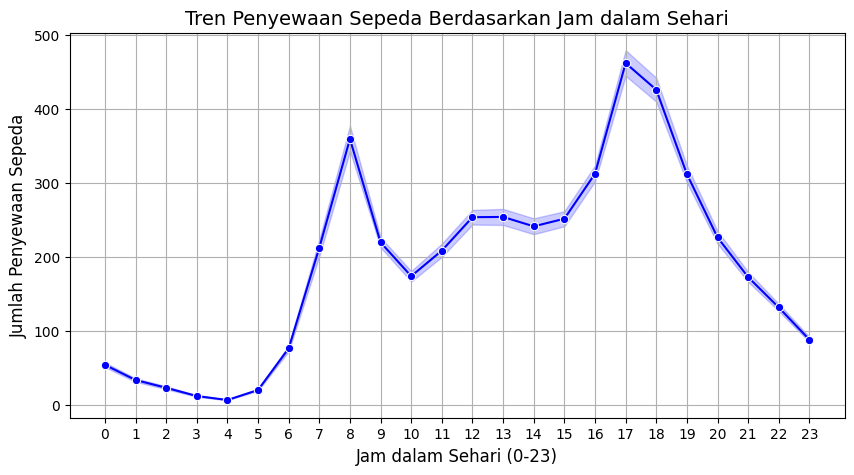

In [57]:

plt.figure(figsize=(10, 5))
sns.lineplot(x=hour_df['hr'], y=hour_df['cnt'], marker='o', color='blue')
plt.title("Tren Penyewaan Sepeda Berdasarkan Jam dalam Sehari", fontsize=14)
plt.xlabel("Jam dalam Sehari (0-23)", fontsize=12)
plt.ylabel("Jumlah Penyewaan Sepeda", fontsize=12)
plt.xticks(range(0, 24))  
plt.grid(True)
plt.show()

**Insight:**
- Dari grafik ini, kita dapat melihat bahwa sebagian besar penyewaan sepeda terjadi pada jam-jam produktif, yaitu pagi hari saat berangkat kerja dan sore hari saat pulang kerja. Sangat sedikit penyewaan sepeda yang terjadi pada jam-jam non-produktif seperti tengah malam hingga dini hari.

### Pertanyaan 5: Faktor apa yang paling mempengaruhi jumlah penyewaan sepeda?

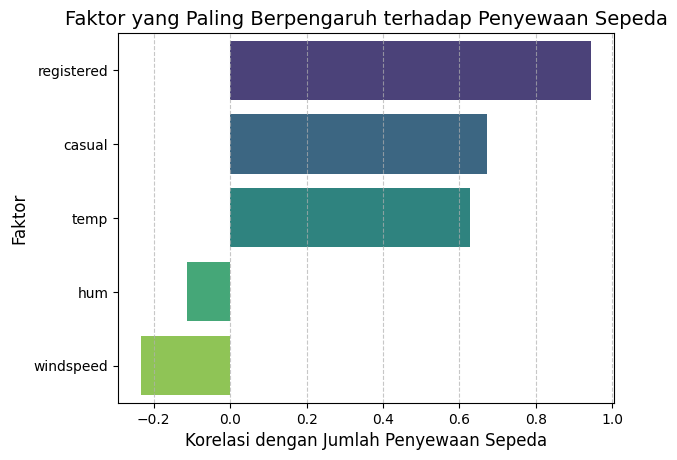

In [58]:

correlation_features = ["temp", "hum", "windspeed", "registered", "casual"]
correlation_matrix = day_df[correlation_features + ["cnt"]].corr()

correlation_sorted = correlation_matrix["cnt"].drop("cnt").sort_values(ascending=False).reset_index()

sns.barplot(x=correlation_sorted["cnt"], y=correlation_sorted["index"], hue=correlation_sorted["index"], palette="viridis", orient="h", dodge=False, legend=False)
plt.title("Faktor yang Paling Berpengaruh terhadap Penyewaan Sepeda", fontsize=14)
plt.xlabel("Korelasi dengan Jumlah Penyewaan Sepeda", fontsize=12)
plt.ylabel("Faktor", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

**Insight:**
- Faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda adalah jenis pengguna (terdaftar dan kasual) serta suhu (temp) karena memiliki korelasi tertinggi.

**Insight (Keseluruhan):**

- Pertanyaan ke-1:
  - Cuaca cerah memiliki median penyewaan tertinggi dengan distribusi yang lebih luas, menunjukkan banyak hari dengan jumlah penyewaan yang tinggi.
  - Cuaca berawan memiliki jumlah penyewaan yang lebih rendah dibandingkan cuaca cerah, tetapi masih cukup tinggi dibandingkan hujan ringan.
  - Cuaca hujan ringan memiliki jumlah penyewaan yang jauh lebih rendah, menunjukkan bahwa mayoritas hari dengan hujan ringan mengalami jumlah penyewaan yang rendah.
- Pertanyaan ke-2:
  - Musim semi memiliki rata-rata penyewaan terendah dibandingkan musim lainnya. Ini mungkin karena cuaca yang masih dingin atau sering hujan di awal tahun.
  - Musim panas dan musim gugur menunjukkan jumlah penyewaan tertinggi, dengan musim gugur sedikit lebih tinggi.
  - Musim dingin mengalami penurunan jumlah penyewaan dibandingkan musim panas dan gugur, tetapi masih lebih tinggi dari musim semi.
- Pertanyaan ke-3:
  - Jumlah penyewaan di hari kerja dan akhir pekan terlihat hampir sama, yang berarti rata-rata penggunaan sepeda tidak berbeda jauh antara keduanya.
- Pertanyaan ke-4:
  - Berdasarkan grafik tren penyewaan sepeda berdasarkan jam dalam sehari, terlihat bahwa ada dua puncak utama dalam penggunaan sepeda, yaitu pada pukul 08:00 dan 18:00. Pola ini mengindikasikan bahwa sepeda banyak digunakan saat jam berangkat dan pulang kerja/sekolah.
- Pertanyaan ke-5:
  - Faktor yang paling berpengaruh terhadap jumlah penyewaan sepeda adalah suhu (temp dan atemp) dan jenis pengguna (registered dan casual) karena memiliki korelasi paling tinggi.

## Conclusion

**Insight :**

- Pertanyaan ke-1:
  - Cuaca buruk, terutama hujan ringan, secara signifikan mengurangi jumlah penyewaan sepeda. Sementara itu, kondisi cerah dan berawan memiliki lebih banyak variasi, kemungkinan dipengaruhi oleh faktor lain seperti jenis hari (hari kerja atau akhir pekan). Outlier menunjukkan adanya hari-hari tertentu dengan penyewaan sangat tinggi atau rendah, yang bisa menjadi objek analisis lebih lanjut.

- Pertanyaan ke-2:
  - Tren penyewaan sepeda meningkat pada musim panas dan gugur, yang dapat dikaitkan dengan kondisi cuaca yang lebih nyaman. Sebaliknya, musim semi memiliki penyewaan terendah, mungkin karena transisi dari musim dingin yang masih kurang ideal untuk bersepeda. Penurunan di musim dingin tidak seburuk musim semi, menunjukkan bahwa ada kelompok pengguna setia yang tetap menggunakan sepeda meskipun suhu dingin.

- Pertanyaan ke-3:
  - Jumlah penyewaan sepeda secara umum tidak berbeda jauh antara hari kerja dan akhir pekan. Namun, pola penggunaan berbeda—hari kerja menunjukkan dua puncak pada pagi dan sore hari, mencerminkan penggunaan sepeda untuk keperluan komuter. Sebaliknya, akhir pekan memiliki distribusi penyewaan yang lebih merata sepanjang hari, mengindikasikan bahwa sepeda lebih sering digunakan untuk rekreasi atau aktivitas santai.

- Pertanyaan ke-4:
  - Ada dua puncak utama dalam penyewaan sepeda, yaitu pukul 08:00 pagi dan 18:00 sore, terutama pada hari kerja. Ini menunjukkan bahwa sepeda digunakan sebagai moda transportasi utama bagi sebagian orang dalam perjalanan menuju atau pulang dari tempat kerja/sekolah. Pada akhir pekan, pola ini menghilang, dengan penyewaan yang lebih stabil sepanjang hari.

- Pertanyaan ke-5:
  - Suhu udara memiliki korelasi positif dengan jumlah penyewaan sepeda—semakin tinggi suhu, semakin banyak sepeda yang disewa. Hal ini terlihat dari korelasi antara suhu dengan jumlah penyewaan yang cukup kuat (r = 0.63) serta pola peningkatan penyewaan di bulan-bulan dengan suhu lebih hangat (Mei-September). Sebaliknya, penyewaan menurun pada bulan yang lebih dingin seperti Januari, Februari, November, dan Desember.